About Dataset

1. The dataset contains transactions made by credit cards in September 2013 by European cardholders.
2. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.
3. It contains only numerical input variables which are the result of a PCA transformation from V1 to V28.
4. The only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.
7. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.



Resouce = https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Importing Dataset

In [4]:
# connect google colab with your gdrive to read your data

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# The path format is "/content/drive/My Drive/<path to your files>"
file_path = '/content/drive/My Drive/project/data-science/credit-fraud-detection/creditcard.csv'
df = pd.read_csv(file_path)

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

The data contain 284807 rows with 31 columns. Most of them are numerical column, either float or int type.

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<Axes: >

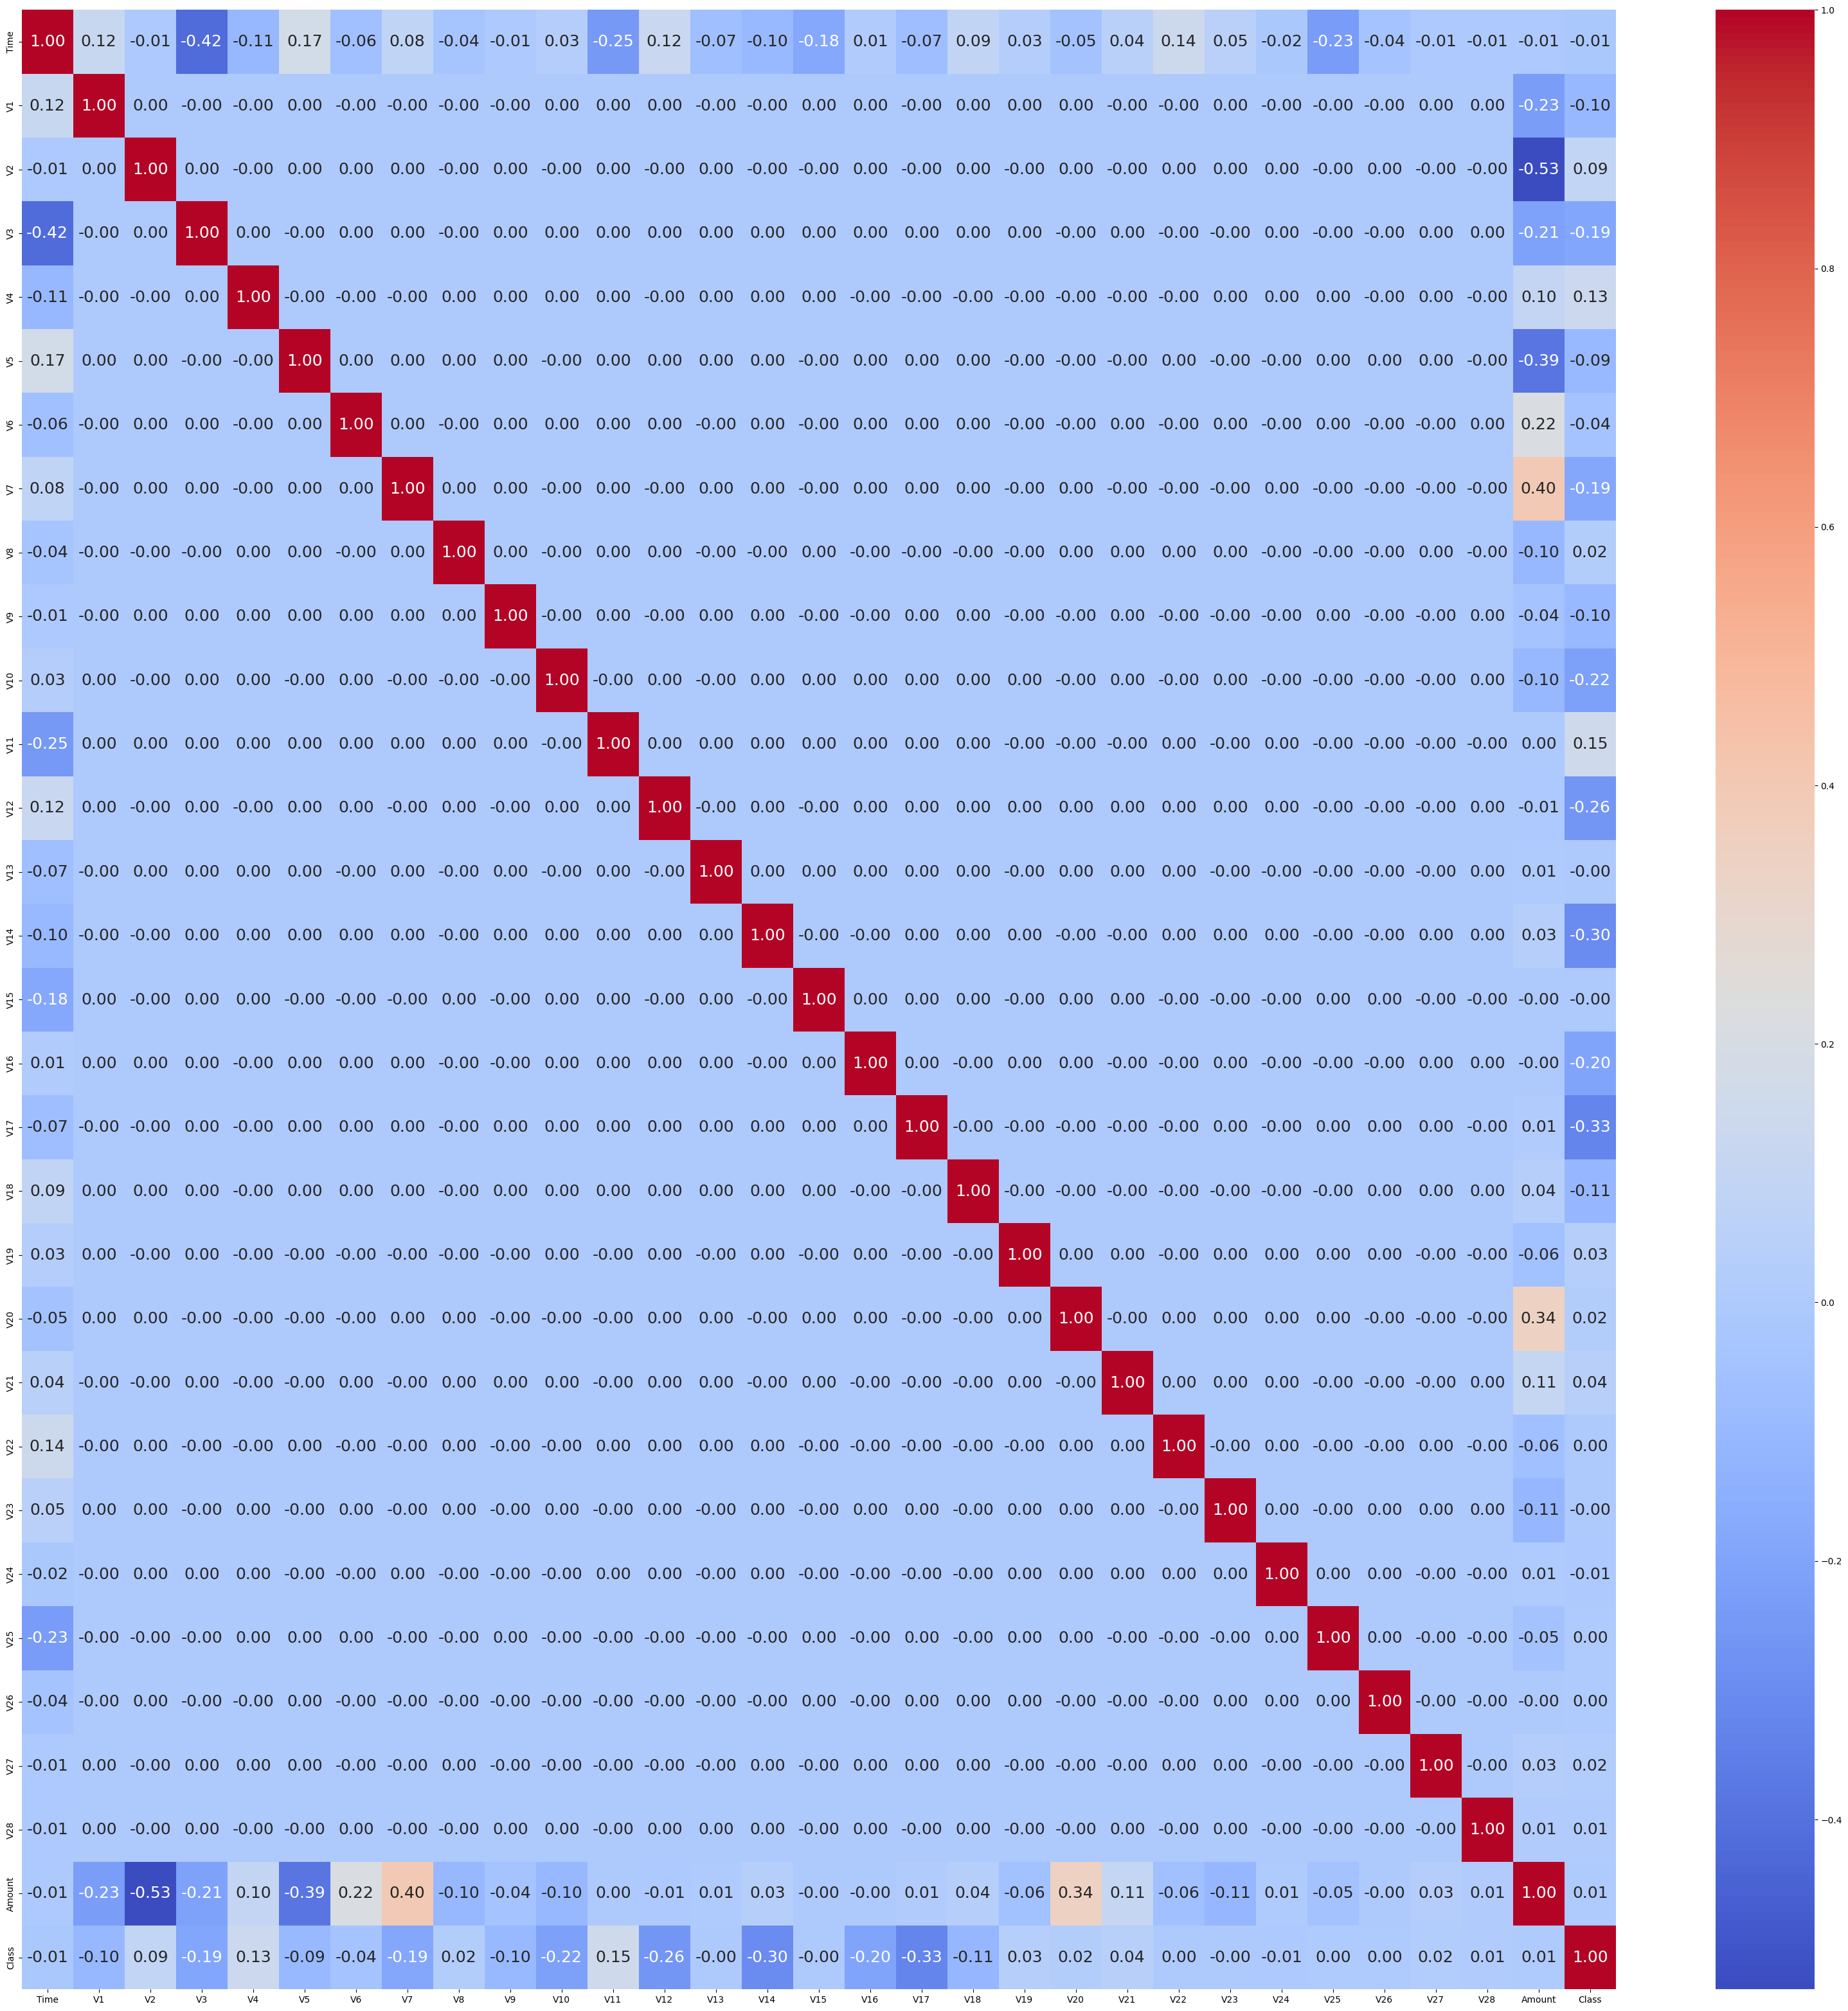

In [9]:
plt.figure(figsize=(40, 40))

corr = df.corr()

sns.heatmap(corr,
            annot=True,
            annot_kws={"size": 18},
            cmap='coolwarm',
            fmt='.2f')

There is no significant relationship between the features, so we can ensure that there is no multicollinearity in this dataset.

# Data Cleaning

In [10]:
# check missing values

df.isnull().sum().reset_index(name='total_missing_values').rename(columns={'index':'features'})

,features,total_missing_values
0,Time,0
1,V1,0
2,V2,0
3,V3,0
4,V4,0
5,V5,0
6,V6,0
7,V7,0
8,V8,0
9,V9,0


no single features contain missing values

In [11]:
# check duplicated data

df.duplicated().sum()

np.int64(1081)

In [12]:
# drop duplicated data

df.drop_duplicates(inplace=True)

# Explatory Data Analysis

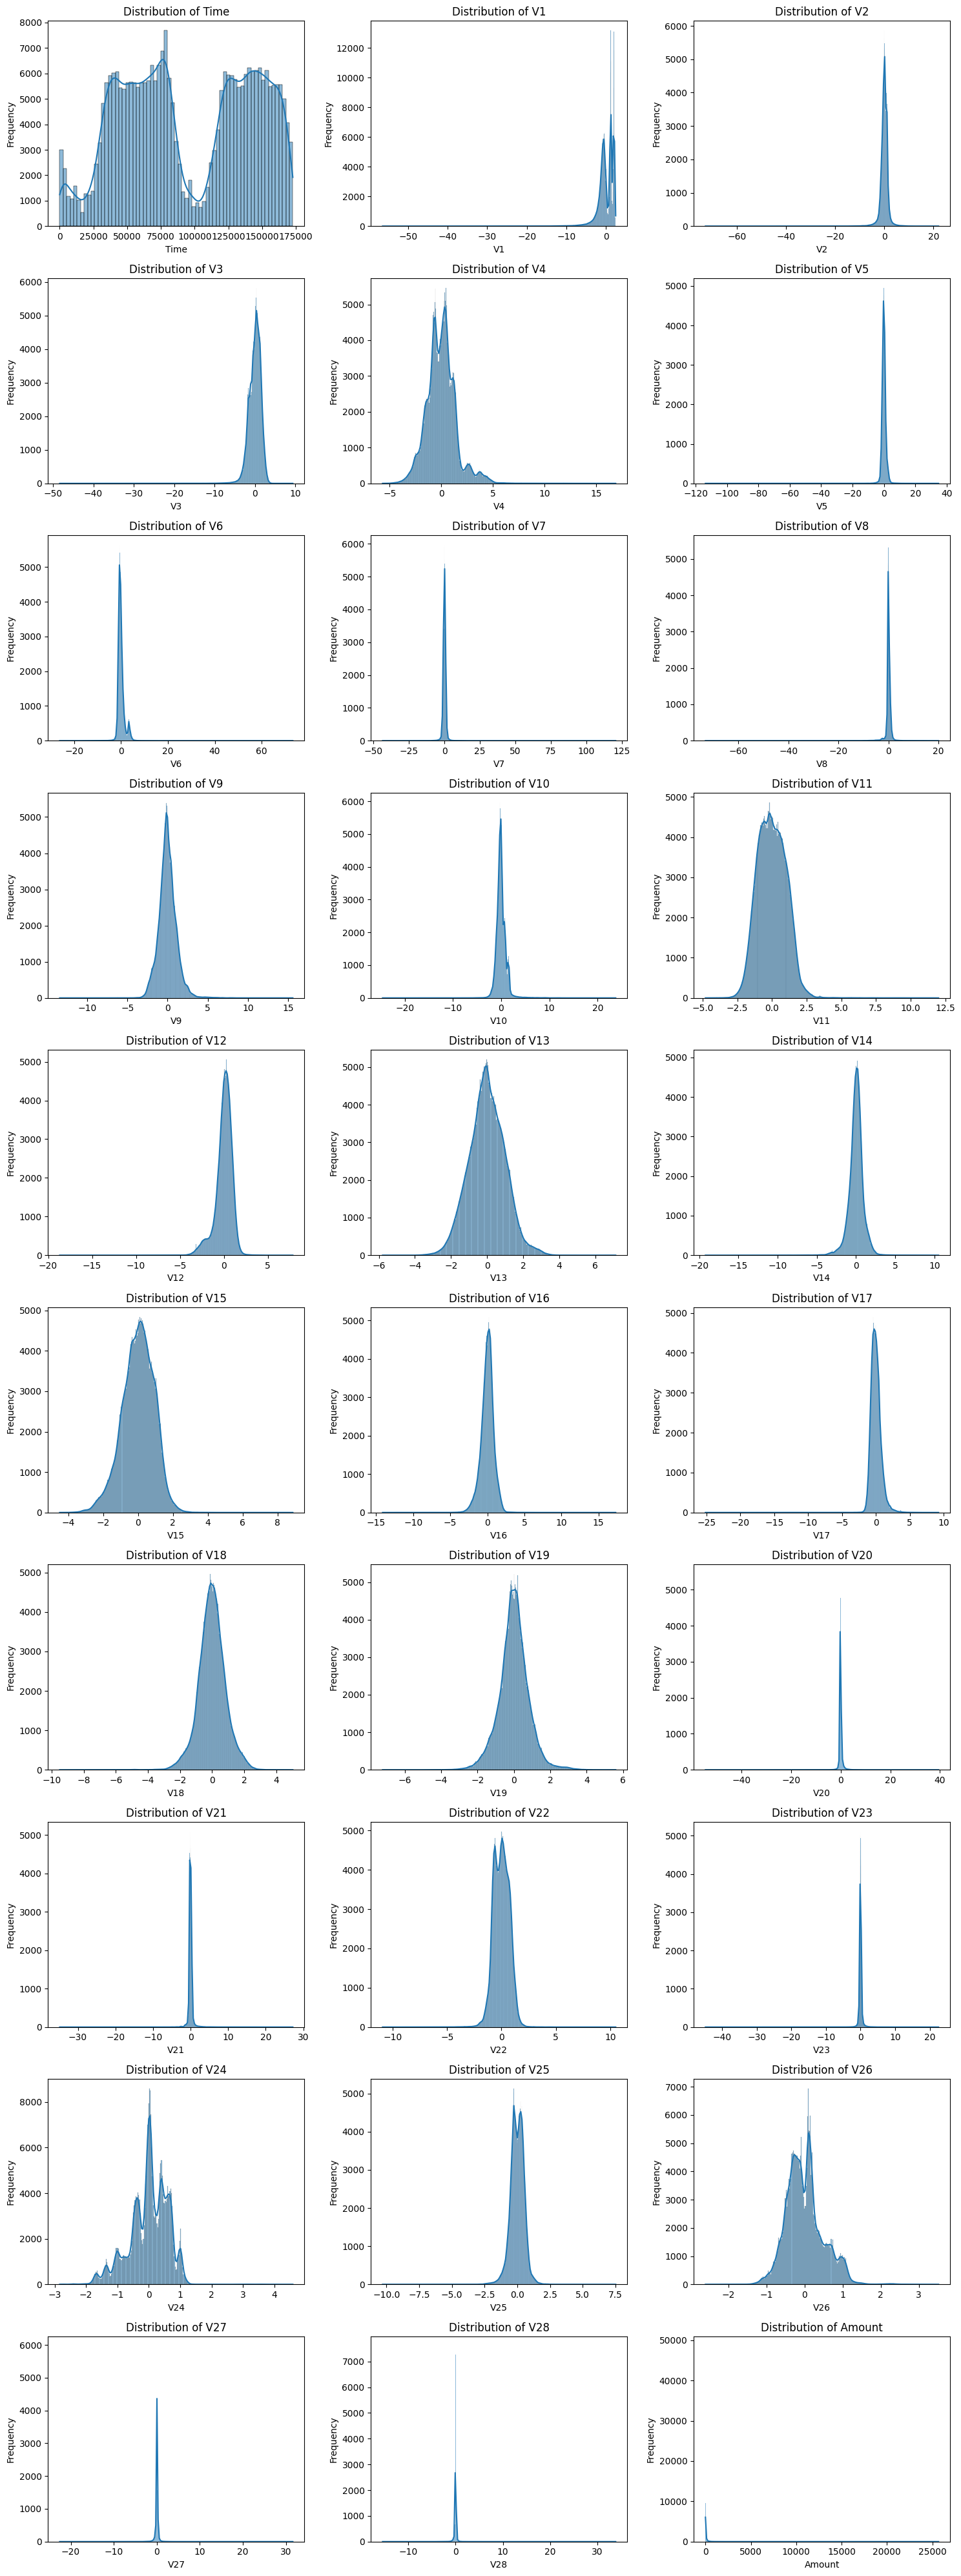

In [13]:
# check distribution of all features

numerical_cols = df.drop(['Class'], axis=1).select_dtypes(include='number').columns

# Determine grid size
n_cols = len(numerical_cols)
n_cols_per_row = 3  # Customize this if needed
n_rows = math.ceil(n_cols / n_cols_per_row)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols_per_row, figsize=(5 * n_cols_per_row, 4 * n_rows))
axes = axes.flatten()

# Plot each column
for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Turn off unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Class Distribution')

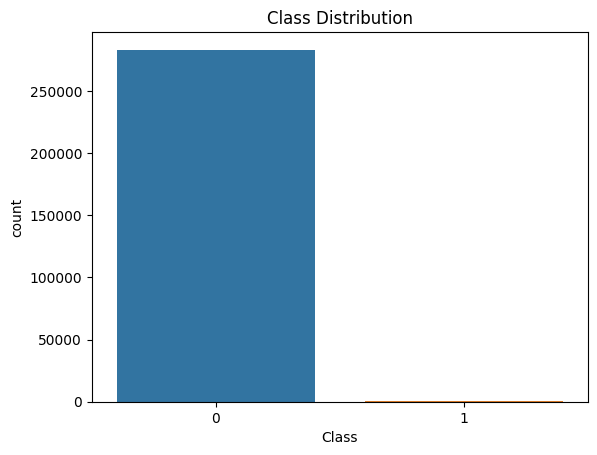

In [14]:
sns.countplot(data=df, x='Class', hue='Class', legend=False)
plt.title('Class Distribution')

In [15]:
class_percentage = df.groupby('Class').size().reset_index(name='count')
class_percentage['percentage'] = (class_percentage['count']/class_percentage['count'].sum() * 100).round(2).astype(str) + '%'
class_percentage

,Class,count,percentage
0,0,283253,99.83%
1,1,473,0.17%


The dataset is highly imbalanced, with less than 0.2% of transactions being fraudulent compared to non-fraudulent transactions. Therefore, we should apply an appropriate oversampling or undersampling method, followed by using the right metrics to evaluate the machine learning model.

In [16]:
data = df[df['Class'] == 1]
data_sorted = data.sort_values(by='Time', ascending=True).reset_index(drop=True)

diff = data_sorted['Time'].shift(-1) - data_sorted['Time']
diff.dropna(inplace=True)

mean_diff = diff.mean()
std_diff = diff.std(ddof=0)

print("\nMean of differences:", mean_diff)
print("Standard deviation of differences:", std_diff)


Mean of differences: 360.04661016949154
Standard deviation of differences: 612.4743940939184


The average time gap between one transaction and the next (time → time + gap) for fraudulent transactions is approximately ±5 minutes, with a standard deviation of ±10 minutes. This result could be more accurate if account ID information were available, allowing us to perform the same calculation on a per-account basis.

In [17]:
class0_amount = df['Amount'][df['Class']==0]
class1_amount = df['Amount'][df['Class']==1]

print(class0_amount.describe())
print(class1_amount.mean())

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64
123.87186046511628


# Preprocessing

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = df.drop('Class', axis=1)
y = df['Class']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y
                                                    )

# Modelling

In [21]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from imblearn.pipeline import Pipeline as ImbPipeline

from imblearn.over_sampling import SMOTE

from sklearn.metrics import classification_report

from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict

## Pipeline

### Random Forest

In [22]:
pipeline_rf = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier())
])

In [23]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
y_pred = cross_val_predict(pipeline_rf, X, y, cv=skf)

In [24]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    283253
           1       0.88      0.82      0.85       473

    accuracy                           1.00    283726
   macro avg       0.94      0.91      0.92    283726
weighted avg       1.00      1.00      1.00    283726



### XGBoost

In [27]:
pipeline_xgb = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', XGBClassifier())
])

In [28]:
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 5, 6],
    'model__learning_rate': [0.01, 0.1, 0.3]
}

In [ ]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=pipeline_xgb,
    param_grid=param_grid,
    cv=skf,
    scoring='f1',  # atau 'recall', 'accuracy', dsb
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X, y)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


In [ ]:
print("Best Params:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Params: {'model__learning_rate': 0.3, 'model__max_depth': 6, 'model__n_estimators': 200}
Best Score: 0.8398963501178432


In [ ]:
best_params = {'model__learning_rate': 0.3, 'model__max_depth': 6, 'model__n_estimators': 200}

In [ ]:
pipeline_xgb.set_params(**best_params)
pipeline_xgb.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.3,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [ ]:
y_pred = pipeline_xgb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.86      0.80      0.83        95

    accuracy                           1.00     56746
   macro avg       0.93      0.90      0.92     56746
weighted avg       1.00      1.00      1.00     56746



In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
MLPC = MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000)
MLPC.fit(X_train, y_train)
y_pred = MLPC.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.49      0.45      0.47        95

    accuracy                           1.00     56746
   macro avg       0.75      0.73      0.74     56746
weighted avg       1.00      1.00      1.00     56746



### LGBM

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
pipeline_lgbm = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', LGBMClassifier())
])

In [ ]:
param_grid_lgbm = {
    'model__n_estimators': [100, 300, 500],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7],
}

In [ ]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=pipeline_lgbm,
    param_grid=param_grid_lgbm,
    cv=skf,
    scoring='f1',  # atau 'recall', 'accuracy', dsb
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X, y)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[LightGBM] [Info] Number of positive: 283253, number of negative: 283253
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.323868 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 566506, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('model', LGBMClassifier())]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.01, 0.1, 0.2],
                         'model__max_depth': [3, 5, 7],
                         'model__n_estimators': [100, 300, 500]},
             scoring='f1', verbose=1)

In [ ]:
grid_search.best_params_

{'model__learning_rate': 0.1,
 'model__max_depth': 7,
 'model__n_estimators': 500,
 'model__num_leaves': 63}

In [ ]:
best_params = {'model__learning_rate': 0.1,
 'model__max_depth': 7,
 'model__n_estimators': 500,
 'model__num_leaves': 63}

In [ ]:
pipeline_lgbm.set_params(**best_params)
pipeline_lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 226602, number of negative: 226602
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.099965 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 453204, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('model',
                 LGBMClassifier(learning_rate=0.3, max_depth=6,
                                n_estimators=200))])

In [ ]:
y_pred = pipeline_lgbm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.91      0.78      0.84        95

    accuracy                           1.00     56746
   macro avg       0.96      0.89      0.92     56746
weighted avg       1.00      1.00      1.00     56746

